In [1]:
%matplotlib qt
#%matplotlib nbagg
#%matplotlib inline
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt

# 1. Loading your .bcf file

In [2]:
s1=hs.load('2.bcf') # replace 1.bcf to your xxx.bcf file

# 2. Check if the elements were selected and if the X-ray lines were selected

In [3]:
s1[1].add_elements(['N','C']) # You can add your elements of interest here using 'element',

In [4]:
s1[1].set_lines(['N_Ka', 'C_Ka'])

In [5]:
s1[1].metadata.Sample.elements 
#there should be a list of elements printed here. If not, please use the following cell to add the element(s). Otherwise, 
#skip the next cell

['C', 'N', 'O', 'Si']

In [6]:
s1[1].metadata.Sample.xray_lines #there should be a list of X-rays lines printed here. If not, please use the following cell to add the element(s). Otherwise, 
#skip the next cell

['C_Ka', 'N_Ka', 'O_Ka', 'Si_Ka']

# 3. Check your spectrum, if it is noisy, you can bin the pixel to enhance the signal-to-noise ratio

In [7]:
s1[1].plot() # you can drag the red dot on the top left in the navigation image to locate the ROI and check the EDS spectrum.

In [31]:
s1[1]

<EDSTEMSpectrum, title: EDX, dimensions: (171, 68|2048)>

In [39]:
#Bin the pixel if it is noisy.
s=s1[1].rebin(scale=(1,1,1)) # scale = (x,x,1), x,x is the binning number you want to type. 2 refers to integrate 4 pixel into 1,
#3 corresponding to 9, 4 corresponding to 16 and etc. Binning will decrease the spatial resolution, so you need to consider this
# trade-off
s.plot()

In [40]:
# if you want to integrate horizontal or vertical pixel, run the following
s=s1[1].isig[0.2:2.]# use float value to choose energy range
bw = s.estimate_background_windows(line_width=[0.2,0.2]) 
def plot_binning_image(s,input):
    integrated_v=np.shape(s)[0]
    s_v=s.rebin(scale=(2,integrated_v,1))
    integrated_h=np.shape(s)[1]
    s_h=s.rebin(scale=(integrated_h,1,1))
    if input=='h':
        s_h.plot(background_windows=bw)
    elif input=='v':
        s_v.plot()
    else:
        print ('Please type "h" for horizontal integration, "v" for vertical integration.')
        

plot_binning_image(s,'h') #swith 'h' to 'v' if you want to sum vertically

# 4. Removing the background, negative pixel and plot the image based on your need.

In [49]:
#s2=s.isig[5.:13.]
#s2.plot()
#s.add_elements(['Hf','O','W','Zr'])
bw = s.estimate_background_windows(line_width=[0.2, 0.2]) 
#s.plot(background_windows=bw)
eds_maps=s.get_lines_intensity(['C_Ka', 'N_Ka', 'O_Ka', 'Si_Ka'],background_windows=bw, integration_windows=0.3)
list_element=['Carbon','Nitrogen','Oxygen','Silicon']


def negative_removal(eds_maps):
    for i in range(len(eds_maps)):
        raw_data=eds_maps[i].data
        raw_data[raw_data<0]=0
    return eds_maps

eds_maps=negative_removal(eds_maps)
#Please type "o" for overlay image, "i" for plotting each elemental map
def plot_images(eds_maps,plot_type='i'):
    list_of_colors=['y','r','cyan','b']
    if plot_type=='o':
        hs.plot.plot_images(eds_maps, axes_decor='off',overlay=True,tight_layout=True,colors=list_of_colors)
    elif plot_type=='i':
        for i in range(len(eds_maps)):
            hs.plot.plot_images(eds_maps[i:i+1], axes_decor='off',
                                    overlay=True,tight_layout=True,colors=list_of_colors[i],vmax=data_list[i])
            #plt.savefig('{}.tif'.format(list_element[i]))
    else:
        print('Please type "o" for overlay image, "i" for plotting each elemental map' )
plot_images(eds_maps,'o')

In [43]:
#s2=s.isig[5.:13.]
#s2.plot()
#s.add_elements(['Hf','O','W','Zr'])
bw = s.estimate_background_windows(line_width=[0.2, 0.2]) 
#s.plot(background_windows=bw)
eds_maps=s.get_lines_intensity(['C_Ka', 'N_Ka', 'O_Ka','Si_Ka'],background_windows=bw, integration_windows=0.3)
list_element=['Carbon','Nitrogen','Silicon']


def negative_removal(eds_maps):
    for i in range(len(eds_maps)):
        raw_data=eds_maps[i].data
        raw_data[raw_data<0]=0
    return eds_maps

eds_maps=negative_removal(eds_maps)
#Please type "o" for overlay image, "i" for plotting each elemental map
def plot_images(eds_maps,plot_type='i'):
    list_of_colors=['y','r','cyan','b']
    if plot_type=='o':
        hs.plot.plot_images(eds_maps, axes_decor='off',overlay=True,tight_layout=True,colors=list_of_colors)
    elif plot_type=='i':
        for i in range(len(eds_maps)):
            if i ==1:
                hs.plot.plot_images(eds_maps[i:i+1], axes_decor='off',
                    overlay=True,tight_layout=True,colors=list_of_colors[i],vmax=data_list[i]*2)
            elif i==3:
                hs.plot.plot_images(eds_maps[i:i+1], axes_decor='off',
                                    overlay=True,tight_layout=True,colors=list_of_colors[i],vmax=data_list[i]/5)
            else:
                hs.plot.plot_images(eds_maps[i:i+1], axes_decor='off',
                                    overlay=True,tight_layout=True,colors=list_of_colors[i],vmax=data_list[i]/3)
            #plt.savefig('{}.tif'.format(list_element[i]))
    else:
        print('Please type "o" for overlay image, "i" for plotting each elemental map' )
plot_images(eds_maps,'i')

In [50]:
kfactors=[11.907,3.218,1.7,3.596]
weight_percent = s.quantification(eds_maps, method='CL',
                                  factors=kfactors,composition_units='weight')

In [51]:
eds_maps[1]

<BaseSignal, title: X-ray line intensity of EDX: N_Ka at 0.39 keV, dimensions: (171, 68|)>

In [52]:
plot_images(weight_percent,'i')

In [10]:
data_list=[]

for i in range(4):
    data_list.append(np.max(eds_maps[i].data))

C,N,O,Si=data_list[0],data_list[1],data_list[2],data_list[3]
C

4.2

In [48]:
def threshold_images(eds_maps,Print=False):
    raw_data_max={}
    raw_data_min={}
    for i in range(len(eds_maps)):
        raw_data=eds_maps[i].data
        element=str(eds_maps[i].metadata.Sample.xray_lines[0])
        raw_data_max[element]=np.max(raw_data)
        raw_data_min[element]=np.min(raw_data)
        if Print is True:
            print ('Max intensity of %s map is '%element, np.max(raw_data),'. Min intensity of %s map is '%element,np.min(raw_data))
    return(raw_data_max,raw_data_min)
thresholds=threshold_images(eds_maps,Print=True)
#def change_threshold(eds_maps,thresholds):
thresholds_max=thresholds[0]
thresholds_min=thresholds[1]
eds_maps[1].data
step=10
my_list = [i / 10 for i in range(1,int(thresholds_max['N_Ka']*step),int(thresholds_max['N_Ka']))]
print(my_list)
eds_maps_mod=eds_maps

Max intensity of C_Ka map is  4.818181818181818 . Min intensity of C_Ka map is  0.0
Max intensity of N_Ka map is  4.0 . Min intensity of N_Ka map is  0.0
Max intensity of O_Ka map is  3.4545454545454546 . Min intensity of O_Ka map is  0.0
Max intensity of Si_Ka map is  6.75 . Min intensity of Si_Ka map is  0.0
[0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5, 2.9, 3.3, 3.7]


In [14]:
def change_threshold_In(a,step=10):
    for i in my_list:
        list_of_colors=['b','y','g']

        raw=a[1].data
        raw[raw>i]=i
        #eds_maps_mod[1].data=raw
        #print('max intensity is ',i)
        #hs.plot.plot_images(eds_maps_mod[1:2], axes_decor='off',overlay=True,tight_layout=True,colors=list_of_colors[1])
change_threshold_In(eds_maps_mod,step=10)
eds_maps[1].data

array([[0. , 0. , 0.1, ..., 0. , 0. , 0.1],
       [0.1, 0. , 0. , ..., 0.1, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.1, 0. ],
       ...,
       [0. , 0.1, 0. , ..., 0. , 0. , 0.1],
       [0. , 0. , 0.1, ..., 0. , 0. , 0. ],
       [0. , 0.1, 0.1, ..., 0. , 0. , 0. ]])

In [565]:
a=[]

In [515]:
hs.plot.plot_images(eds_maps[1], axes_decor='off',overlay=True,tight_layout=True,colors='y')

ValueError: This method only plots signals that are images. The signal dimension must be equal to 2. The signal at position 0 was <BaseSignal, title: X-ray line intensity of EDX: In_La at 3.29 keV, dimensions: (152, 70|)>.

In [499]:
a = 2
step=10

my_list = [i / 10 for i in range(0, int(a*step + 1),a)]

print(my_list)

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]


In [423]:
eds_maps

[<BaseSignal, title: X-ray line intensity of EDX: Hf_Ma at 1.64 keV, dimensions: (152, 70|)>,
 <BaseSignal, title: X-ray line intensity of EDX: In_La at 3.29 keV, dimensions: (152, 70|)>,
 <BaseSignal, title: X-ray line intensity of EDX: Pd_La at 2.84 keV, dimensions: (152, 70|)>]

In [354]:
s_bruker=hs.load(['1STEM_Hf.tif','1STEM_Pd.tif','1STEM_In.tif'])

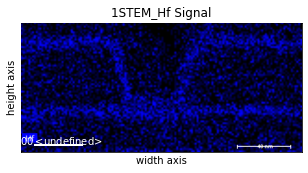

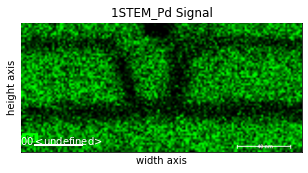

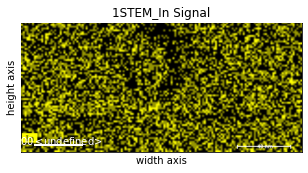

In [361]:
for i in range(len(s_bruker)):
    s_bruker[i].plot()